*PREDICTING THE SURVIVAL OF TITANIC PASSENGERS
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of datascience to predict which passengers survived the tragedy.

In [1]:
#loading required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# read train and test set
train = pd.read_csv("train_titanic.csv")
test = pd.read_csv("test_titanic.csv")

In [5]:
# combining train and test dataset
df = train.append(test, ignore_index=True)

In [6]:
# check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The combined data has missing data in __Age__, __Cabin__, and __Embarked__ features.  

Since __Cabin__ has mostly missing values (~77%), we can simply remove it from our data. We can impute the missing values in __Age__ by median. Since __Embarked__ is a categorical, we will use mode to impute missing values.

In [7]:
# remove cabin
df.drop('Cabin', axis=1, inplace=True)

# missing data imputation
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [8]:
# check missing values again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have successfully imputed all the missing values. 

We will also remove the *Ticket*, *Name* variables as they don't seem to have any impact on the dependent variable.

In [9]:
# remove Ticket and Name variables
df.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Now let's convert the categorical varialbles to numerical variables. 

In [11]:
from sklearn.preprocessing import LabelEncoder

# label enconding
label = LabelEncoder()
df['Embarked_num'] = label.fit_transform(df['Embarked'])
df['Sex_num'] = label.fit_transform(df['Sex'])

df = df.drop(['Sex','Embarked'], axis = 1)

In [12]:
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_num,Sex_num
0,1,0,3,22.0,1,0,7.2500,2,1
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,2,0
3,4,1,1,35.0,1,0,53.1000,2,0
4,5,0,3,35.0,0,0,8.0500,2,1


### Univariate Analysis

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_num,Sex_num
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.536476,0.647587
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.791503,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


In [14]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
df['Sex_num'].value_counts()

1    577
0    314
Name: Sex_num, dtype: int64

Plot histogram of __Age__

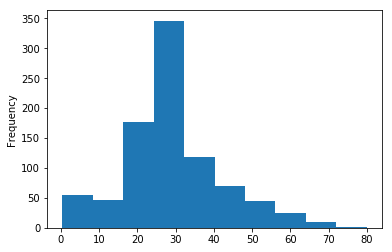

In [17]:
df['Age'].plot.hist()

Plot boxplot of __Age__

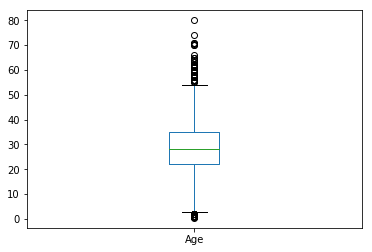

In [18]:
df['Age'].plot.box()

Plot histogram of __Fare__

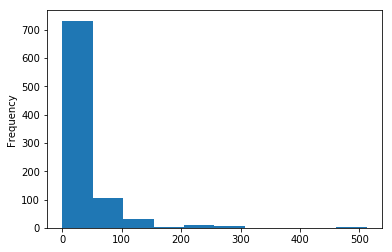

In [19]:
df['Fare'].plot.hist()

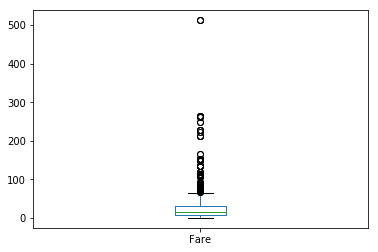

In [20]:
df['Fare'].plot.box()

### Bivariate Analysis

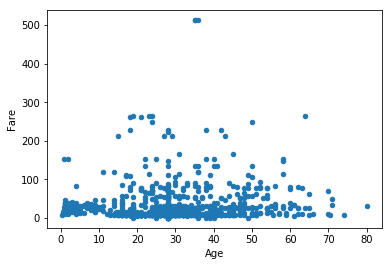

In [21]:
# scatter plot between Age and Fare
df.plot.scatter('Age', 'Fare')

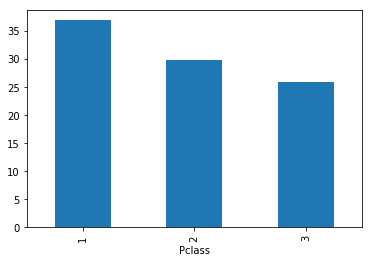

In [22]:
# Pclass vs mean Age
df.groupby('Pclass')['Age'].mean().plot.bar()

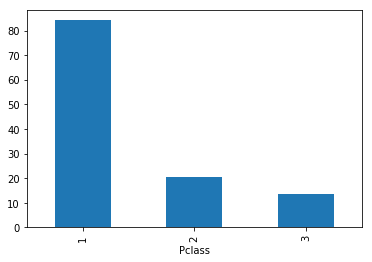

In [23]:
# Pclass vs mean Fare
df.groupby('Pclass')['Fare'].mean().plot.bar()

Let's split __df__ back to train and test set.

In [24]:
train = df[:len(train)]
test = df[len(train):]

true_val = test['Survived']
test.drop(['Survived'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Outlier Treatment

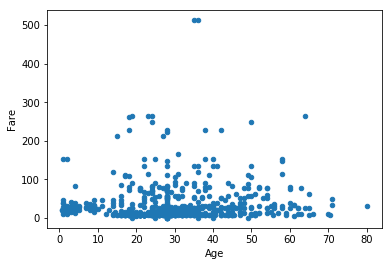

In [25]:
train.plot.scatter('Age', 'Fare')

Rows having Fare greater than 400 are outliers. So, we will remove this from our data.

In [27]:
train = train[train['Fare']<400]

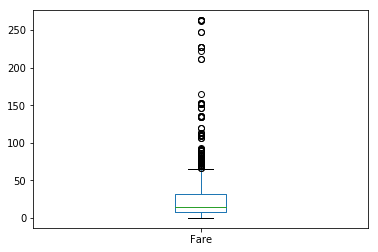

In [28]:
train['Fare'].plot.box()

Replace the outliers in Fare with the mean. The outliers are approximately above 62.

In [29]:
train.loc[train['Fare']>62, 'Fare'] = np.mean(train['Fare'])

Similarly, we will replace the outliers present in the Age variable.

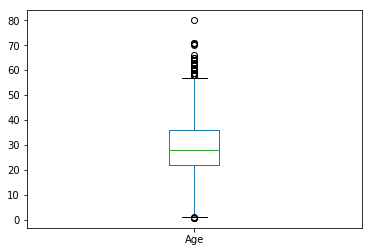

In [30]:
train['Age'].plot.box()

In [31]:
train.loc[train['Age']>55, 'Age'] = np.mean(train['Age'])

### Modeling

In [48]:
xtrain = train.drop('Survived', axis = 1)
ytrain = train['Survived']

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lreg = LogisticRegression()

In [51]:
lreg.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#pred = lreg.predict(test)

In [52]:
y_out = pd.DataFrame(data = lreg.predict(test), columns=["Survived"])

In [60]:
df_out = pd.concat([df["PassengerId"],y_out],axis=1)

In [64]:
df_out.to_csv("./Downloads/logreg-res7.csv",sep=",",index=False)

In [ ]:
#np.savetxt("Downloads/final1.csv", df_out, delimiter=",")

In [58]:
lreg.score(test, true_val)

0.8092485549132948